In [1]:
from utils import set_root

import pandas as pd
import numpy as np

import os

set_root()

Current working directory: /home/guido/github/dev/physioex-private


In [4]:
ssd_results = pd.read_csv("models/ssd/pretrained/msd_results.csv")

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=["MSD", "Accuracy"])

# Add the SSD results
results = results.append(
    {"MSD": "SSD", "Accuracy": ssd_results["test_acc"].mean()}, ignore_index=True
)

msd_path = "models/msd/"

# List all the files in the subdirectories of msd_path
for root, dirs, files in os.walk(msd_path):
    for file in files:
        if file == "test_results.csv":
            result = pd.read_csv(os.path.join(root, file))
            mean_acc = result["test_acc"].mean()

            if "k=1" in root:
                results = results.append(
                    {"MSD": "k=1", "Accuracy": mean_acc}, ignore_index=True
                )
            elif "k=2" in root:
                results = results.append(
                    {"MSD": "k=2", "Accuracy": mean_acc}, ignore_index=True
                )
            elif "k=3" in root:
                results = results.append(
                    {"MSD": "k=3", "Accuracy": mean_acc}, ignore_index=True
                )
            elif "k=4" in root:
                results = results.append(
                    {"MSD": "MSD", "Accuracy": mean_acc}, ignore_index=True
                )
            else:
                print("Error: unknown k value")


order = ["SSD", "k=1", "k=2", "k=3", "MSD"]
results["MSD"] = pd.Categorical(results["MSD"], categories=order, ordered=True)
results = results.sort_values("MSD")

/tmp/ipykernel_2345681/1693759411.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"MSD": "SSD", "Accuracy": ssd_results["test_acc"].mean()}, ignore_index=True)
/tmp/ipykernel_2345681/1693759411.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"MSD": "k=2", "Accuracy": mean_acc}, ignore_index=True)
/tmp/ipykernel_2345681/1693759411.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"MSD": "k=2", "Accuracy": mean_acc}, ignore_index=True)
/tmp/ipykernel_2345681/1693759411.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"MS

/tmp/ipykernel_2345681/4184000650.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(x="MSD", y="Accuracy", data=results, ci="sd", marker="o")


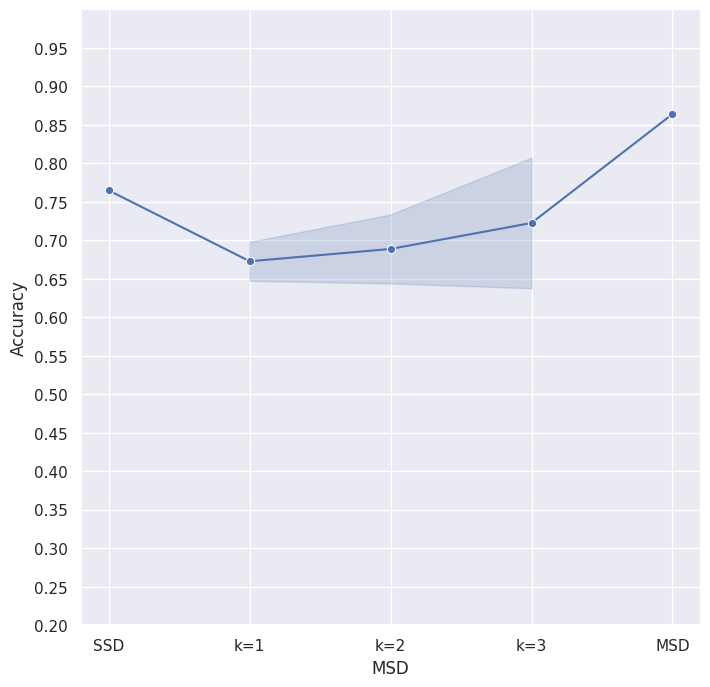

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
sns.set()
# Create the line plot with standard deviation as confidence interval
plt.figure(figsize=(8, 8))
ax = sns.lineplot(x="MSD", y="Accuracy", data=results, ci="sd", marker="o")

# Set y-axis limits
ax.set_ylim(1 / 5, 1)

ax.set_yticks(np.arange(1 / 5, 1, 0.05))

# Show the plot
plt.show()

(0.0, 1.0)

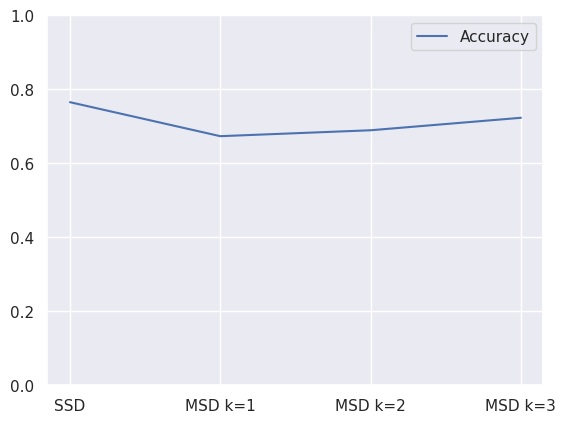

In [20]:
# plot row as a line plot with the x-axis being the k value

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
data = pd.DataFrame(
    row,
    columns=["Accuracy"],
    index=["SSD", "MSD k=1", "MSD k=2", "MSD k=3", "MSD k=4"],
)

# Create the line plot
ax = sns.lineplot(data=data)

# Set y-axis limits
ax.set_ylim(0, 1)